In [421]:
import pandas as pd
import matplotlib.pyplot as plt

In [463]:
data=pd.read_csv("data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (38,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [464]:
data.iloc[0]


Time                                2020-02-13 13:07:44.428101
elapsed_time                                                 0
VDS_Veh_Dist_0                                       0.0204805
VDS_Veh_Speed_0                                     0.00333252
VDS_Accelerator_Pedal_Position_0                   7.89762e-07
VDS_Chassis_CG_Accel_0                              -0.0369013
VDS_Chassis_CG_Accel_1                               0.0064515
VDS_Chassis_CG_Accel_2                              -0.0885838
VDS_Brake_Pedal_Force_0                                      0
VDS_Steering_Wheel_Angle_0                           -0.844574
VDS_Steering_Wheel_Angle_Rate_0                              0
SCC_Lane_Deviation_0                                         0
SCC_Lane_Deviation_1                                         0
SCC_Lane_Deviation_2                                         0
SCC_Lane_Deviation_3                                         0
SCC_Follow_Info_0                                      

In [465]:
data=data.sort_values(by=['pid','scnOrder','Time'])
data["speed_change"]=data["VDS_Veh_Speed_0"]-data["VDS_Veh_Speed_0"].shift(1,axis=0)

In [466]:
data_crosswalk=data[data["closest_cw2"].values!='none']

In [467]:
data_crosswalk["closest_cw2"]

11342       1_CW
11343       1_CW
11344       1_CW
11345       1_CW
11346       1_CW
           ...  
4556630    14_CW
4556631    14_CW
4556632    14_CW
4556633    14_CW
4556634    14_CW
Name: closest_cw2, Length: 1417127, dtype: object

In [468]:
data_crosswalk["speed_change"]

11342     -0.000500
11343     -0.000507
11344     -0.000511
11345     -0.000511
11346     -0.000523
             ...   
4556630   -0.016960
4556631   -0.016970
4556632   -0.016960
4556633   -0.016950
4556634   -0.016960
Name: speed_change, Length: 1417127, dtype: float64

In [469]:
data_crosswalk["Time_without_milisecs"]= data_crosswalk["Time"].apply(lambda x: x.split('.')[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [470]:
data_crosswalk["Time_without_milisecs"]
data_crosswalk

,Time,elapsed_time,VDS_Veh_Dist_0,VDS_Veh_Speed_0,VDS_Accelerator_Pedal_Position_0,VDS_Chassis_CG_Accel_0,VDS_Chassis_CG_Accel_1,VDS_Chassis_CG_Accel_2,VDS_Brake_Pedal_Force_0,VDS_Steering_Wheel_Angle_0,...,PedestrianPresence,SignalStatus,SignalType,SignalCondition,secLog,secLogIndex,secActivity,secEngage,speed_change,Time_without_milisecs
11342,2020-02-13 13:10:53.693100,189265.0,10338.919922,40.936089,3.946457e-01,-0.044336,-0.040082,0.000266,0.00000,-0.061798,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.000500,2020-02-13 13:10:53
11343,2020-02-13 13:10:53.709100,189281.0,10339.919922,40.935581,3.949606e-01,-0.044692,-0.033439,0.000216,0.00000,-0.034332,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.000507,2020-02-13 13:10:53
11344,2020-02-13 13:10:53.725100,189297.0,10340.919922,40.935070,3.952756e-01,-0.045073,-0.024905,0.000170,0.00000,0.006866,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.000511,2020-02-13 13:10:53
11345,2020-02-13 13:10:53.740101,189312.0,10341.919922,40.934559,3.940158e-01,-0.045445,-0.019717,0.000147,0.00000,0.020599,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.000511,2020-02-13 13:10:53
11346,2020-02-13 13:10:53.756100,189328.0,10342.919922,40.934036,3.955906e-01,-0.045821,-0.011005,0.000114,0.00000,0.061798,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.000523,2020-02-13 13:10:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556630,2020-02-18 10:15:47.316303,1132765.0,47891.230000,35.717910,0.000000e+00,-1.493996,0.108937,0.000332,12.81746,0.514984,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.016960,2020-02-18 10:15:47
4556631,2020-02-18 10:15:47.332304,1132781.0,47892.110000,35.700940,0.000000e+00,-1.493484,0.110640,0.001479,13.02873,0.514984,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.016970,2020-02-18 10:15:47
4556632,2020-02-18 10:15:47.348304,1132797.0,47892.980000,35.683980,0.000000e+00,-1.493157,0.110166,0.002619,12.95830,0.514984,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.016960,2020-02-18 10:15:47
4556633,2020-02-18 10:15:47.379303,1132828.0,47893.860000,35.667030,7.897615e-07,-1.492957,0.116171,0.003641,12.95830,0.556183,...,One,RN,RRFB,Non-activated,NaN,NaN,None,No,-0.016950,2020-02-18 10:15:47


In [471]:
data_crosswalk_subset=data_crosswalk.iloc[:2000]

In [472]:
data_crosswalk_subset_grouped=data_crosswalk_subset.groupby("Time_without_milisecs").agg({'SignalType': lambda x: x.value_counts().index[0],
                                                                                          'LV' : lambda x: x.value_counts().index[0],
                                                                                          'pid' : lambda x: x.value_counts().index[0],                                                                                        'scnOrder' : lambda x: x.value_counts().index[0],
                                                                                          'VDS_Veh_Speed_0': 'mean',
                                                                                          'PedestrianPresence' : lambda x: x.value_counts().index[0],
                                                                                          'secEngage' : lambda x: x.value_counts().index[0],
                                                                                          'SignalCondition' : lambda x: x.value_counts().index[0],
                                                                                          'VDS_Brake_Pedal_Force_0' : 'mean',
                                                                                          'VDS_Steering_Wheel_Angle_0' : 'mean',
                                                                                          'gender' : lambda x: x.value_counts().index[0],
                                                                                          'age_group' : lambda x: x.value_counts().index[0]})
data_crosswalk_subset_grouped

,SignalType,LV,pid,scnOrder,VDS_Veh_Speed_0,PedestrianPresence,secEngage,SignalCondition,VDS_Brake_Pedal_Force_0,VDS_Steering_Wheel_Angle_0,gender,age_group
Time_without_milisecs,,,,,,,,,,,,
2020-02-13 13:10:53,RRFB,None,1,A,40.931340,One,No,Non-activated,0.000000,0.347298,Female,18-25
2020-02-13 13:10:54,RRFB,None,1,A,40.909203,One,No,Non-activated,0.000000,0.412216,Female,18-25
2020-02-13 13:10:55,RRFB,None,1,A,40.832608,One,No,Non-activated,0.000000,-0.135498,Female,18-25
2020-02-13 13:10:56,RRFB,None,1,A,40.107834,One,No,Non-activated,0.916166,-0.350883,Female,18-25
2020-02-13 13:10:57,RRFB,None,1,A,39.072182,One,No,Non-activated,5.674634,0.513163,Female,18-25
2020-02-13 13:10:58,RRFB,None,1,A,37.554798,One,No,Non-activated,11.455946,0.326848,Female,18-25
2020-02-13 13:10:59,RRFB,None,1,A,33.875775,One,No,Non-activated,13.525209,-0.294793,Female,18-25
2020-02-13 13:11:00,RRFB,None,1,A,28.777567,One,No,Non-activated,7.381800,0.249944,Female,18-25
2020-02-13 13:11:01,RRFB,None,1,A,25.892517,One,No,Non-activated,0.000000,0.158164,Female,18-25


In [473]:
data_crosswalk_grouped=data_crosswalk.groupby("Time_without_milisecs").agg({'SignalType': lambda x: x.value_counts().index[0],
                                                                                          'pid' : lambda x: x.value_counts().index[0],
                                                                                          'LV' : lambda x: x.value_counts().index[0],                                                                                        'scnOrder' : lambda x: x.value_counts().index[0],
                                                                                          'VDS_Veh_Speed_0': 'mean',
                                                                                          'PedestrianPresence' : lambda x: x.value_counts().index[0],
                                                                                          'secEngage' : lambda x: x.value_counts().index[0],
                                                                                          'SignalCondition' : lambda x: x.value_counts().index[0],
                                                                                          'VDS_Brake_Pedal_Force_0' : 'mean',
                                                                                          'VDS_Steering_Wheel_Angle_0' : 'mean',
                                                                                          'gender' : lambda x: x.value_counts().index[0],
                                                                                          'age_group' : lambda x: x.value_counts().index[0]})
data_crosswalk_grouped

,SignalType,pid,LV,scnOrder,VDS_Veh_Speed_0,PedestrianPresence,secEngage,SignalCondition,VDS_Brake_Pedal_Force_0,VDS_Steering_Wheel_Angle_0,gender,age_group
Time_without_milisecs,,,,,,,,,,,,
2020-01-27 13:29:28,RRFB,34,One,A,41.006692,One,No,Non-activated,0.0,0.141509,Male,35-45
2020-01-27 13:29:29,RRFB,34,One,A,40.403576,One,No,Non-activated,0.0,0.171661,Male,35-45
2020-01-27 13:29:30,RRFB,34,One,A,40.878830,One,No,Non-activated,0.0,0.453875,Male,35-45
2020-01-27 13:29:31,RRFB,34,One,A,41.016976,One,Yes,Non-activated,0.0,-0.441513,Male,35-45
2020-01-27 13:29:32,RRFB,34,One,A,40.803455,One,Yes,Non-activated,0.0,-0.163193,Male,35-45
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 16:12:20,Traditional traffic signal,24,None,A,36.913841,One,Yes,Green,0.0,-1.579513,Female,>=55
2020-02-28 16:12:21,Traditional traffic signal,24,None,A,38.062692,One,Yes,Green,0.0,-1.497345,Female,>=55
2020-02-28 16:12:22,Traditional traffic signal,24,None,A,38.394659,One,Yes,Green,0.0,2.574053,Female,>=55


In [474]:
#"SignalType","PedestrianPresence","secActivity","SignalCondition","VDS_Brake_Pedal_Force_0","VDS_Steering_Wheel_Angle_0","gender","age_group"


data_crosswalk_grouped=data_crosswalk_grouped.reset_index()
data_crosswalk_grouped.to_csv('Toyota_groupedbysec1.csv')

In [475]:
data_crosswalk_grouped=data_crosswalk_grouped.sort_values(by=['pid','scnOrder','Time_without_milisecs'])
data_crosswalk_grouped["speed_change"]=data_crosswalk_grouped["VDS_Veh_Speed_0"]-data_crosswalk_grouped["VDS_Veh_Speed_0"].shift(1,axis=0)

In [476]:
data_crosswalk_grouped["speed_change"]

13258         NaN
13259   -0.022137
13260   -0.076595
13261   -0.724774
13262   -1.035652
           ...   
15947    2.486817
15948    1.866676
15949    2.114106
15950    0.507933
15951   -0.677935
Name: speed_change, Length: 24591, dtype: float64

In [477]:
data_crosswalk_grouped["Hard_Braking"]=0
data_crosswalk_grouped.loc[(data_crosswalk_grouped['speed_change']<=-6.8),'Hard_Braking'] = 1
data_crosswalk_grouped.loc[(data_crosswalk_grouped['speed_change']>-6.8),'Hard_Braking'] = 0

In [689]:
len(data_crosswalk_grouped[data_crosswalk_grouped["Hard_Braking"]==1])

1268

In [690]:
#df=data_crosswalk.groupby("Time_without_milisecs")
#for key, value in df:
#    print(key, value)

In [691]:
y=data_crosswalk_grouped["Hard_Braking"]
X=data_crosswalk_grouped[["SignalType","PedestrianPresence","secEngage","gender","age_group","LV"]]
print(y,X)


13258    0
13259    0
13260    0
13261    0
13262    0
        ..
15947    0
15948    0
15949    0
15950    0
15951    0
Name: Hard_Braking, Length: 24591, dtype: int64       SignalType PedestrianPresence secEngage  gender age_group    LV
13258       RRFB                One        No  Female     18-25  None
13259       RRFB                One        No  Female     18-25  None
13260       RRFB                One        No  Female     18-25  None
13261       RRFB                One        No  Female     18-25  None
13262       RRFB                One        No  Female     18-25  None
...          ...                ...       ...     ...       ...   ...
15947       RRFB                One        No    Male      >=55   One
15948       RRFB                One        No    Male      >=55   One
15949       RRFB                One        No    Male      >=55   One
15950       RRFB                One        No    Male      >=55   One
15951       RRFB                One        No    Male      >=

In [692]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X['gender'].astype(str))
X['gender'] = le.transform(X['gender'].astype(str))
le = LabelEncoder()
le.fit(X['secEngage'].astype(str))
X['secEngage'] = le.transform(X['secEngage'].astype(str))
le = LabelEncoder()
le.fit(X['age_group'].astype(str))
X['age_group'] = le.transform(X['age_group'].astype(str))
le = LabelEncoder()
le.fit(X['PedestrianPresence'].astype(str))
X['PedestrianPresence'] = le.transform(X['PedestrianPresence'].astype(str))
le = LabelEncoder()
le.fit(X['SignalType'].astype(str))
X['SignalType'] = le.transform(X['SignalType'].astype(str))
le = LabelEncoder()
le.fit(X['LV'].astype(str))
X['LV'] = le.transform(X['LV'].astype(str))
print(X)

       SignalType  PedestrianPresence  secEngage  gender  age_group  LV
13258           0                   1          0       0          0   0
13259           0                   1          0       0          0   0
13260           0                   1          0       0          0   0
13261           0                   1          0       0          0   0
13262           0                   1          0       0          0   0
...           ...                 ...        ...     ...        ...  ..
15947           0                   1          0       1          2   1
15948           0                   1          0       1          2   1
15949           0                   1          0       1          2   1
15950           0                   1          0       1          2   1
15951           0                   1          0       1          2   1

[24591 rows x 6 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [693]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
len(X_train),len(X_test)

(19672, 4919)

In [694]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [696]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4640    0]
 [ 279    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4640
           1       0.00      0.00      0.00       279

    accuracy                           0.94      4919
   macro avg       0.47      0.50      0.49      4919
weighted avg       0.89      0.94      0.92      4919



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [482]:
data_concat_postrecoding=pd.concat([y,X],axis=1)
data_concat_postrecoding

,Hard_Braking,SignalType,PedestrianPresence,secEngage,gender,age_group,LV
13258,0,0,1,0,0,0,0
13259,0,0,1,0,0,0,0
13260,0,0,1,0,0,0,0
13261,0,0,1,0,0,0,0
13262,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
15947,0,0,1,0,1,2,1
15948,0,0,1,0,1,2,1
15949,0,0,1,0,1,2,1
15950,0,0,1,0,1,2,1


In [248]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from sklearn.svm import OneClassSVM 


train, test = train_test_split(train, test_size=.2) 
train_normal = train[train['Hard_Braking']==0] 
train_outliers = train[train['Hard_Braking']==1] 
outlier_prop = len(train_outliers) / len(train_normal) 
svm = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.001) 
svm.fit(train_normal[['SignalType','PedestrianPresence','secEngage','gender','age_group']])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.01870792335577421, shrinking=True, tol=0.001,
            verbose=False)

In [249]:
train_normal

,Hard_Braking,SignalType,PedestrianPresence,secEngage,gender,age_group
17271,0,1,0,0,0,2
6823,0,1,0,1,1,0
617,0,0,1,0,1,1
8231,0,1,1,1,1,1
22381,0,0,1,0,0,0
...,...,...,...,...,...,...
15273,0,1,0,0,1,2
23762,0,1,0,0,0,2
15143,0,2,1,1,0,0
11271,0,0,0,1,0,1


Text(0, 0.5, 'age_group')

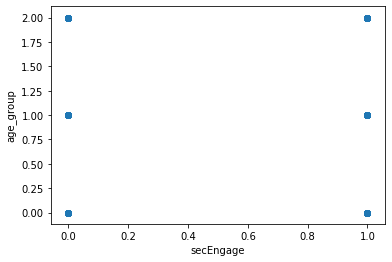

In [250]:
x = test['secEngage'] 
y = test['age_group'] 
plt.scatter(x, y, alpha=0.7) 
plt.xlabel('secEngage') 
plt.ylabel('age_group')

In [251]:
y_pred = svm.predict(test[['SignalType','PedestrianPresence','secEngage','gender','age_group']]) 
y_pred=pd.DataFrame(y_pred)
len(y_pred[y_pred.iloc[:,0]==-1])

457

In [252]:
y_test=test['Hard_Braking']
print(confusion_matrix(y_test,y_pred))

[[   0    0    0]
 [ 451    0 3421]
 [   6    0   57]]


In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7013    0]
 [ 481    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7013
           1       0.00      0.00      0.00       481

    accuracy                           0.94      7494
   macro avg       0.47      0.50      0.48      7494
weighted avg       0.88      0.94      0.90      7494



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
from frameworks.SelfLearning import *


ModuleNotFoundError: No module named 'frameworks'

In [483]:
import pandas as pd
import numpy as np
from sklearn import svm

In [484]:
data_concat_postrecoding

,Hard_Braking,SignalType,PedestrianPresence,secEngage,gender,age_group,LV
13258,0,0,1,0,0,0,0
13259,0,0,1,0,0,0,0
13260,0,0,1,0,0,0,0
13261,0,0,1,0,0,0,0
13262,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
15947,0,0,1,0,1,2,1
15948,0,0,1,0,1,2,1
15949,0,0,1,0,1,2,1
15950,0,0,1,0,1,2,1


In [485]:
nor_obs = data_concat_postrecoding.loc[data_concat_postrecoding['Hard_Braking']==0]
ano_obs = data_concat_postrecoding.loc[data_concat_postrecoding['Hard_Braking']==1]

In [486]:
train, test = train_test_split(nor_obs, test_size=.2) 
train,test

(       Hard_Braking  SignalType  PedestrianPresence  secEngage  gender  \
 10823             0           1                   1          0       0   
 15555             0           1                   0          0       1   
 22307             0           0                   1          1       0   
 10049             0           0                   1          0       1   
 21796             0           1                   1          0       0   
 ...             ...         ...                 ...        ...     ...   
 22967             0           1                   1          0       0   
 4035              0           1                   0          0       1   
 22108             0           2                   1          0       0   
 10189             0           0                   1          0       1   
 9567              0           0                   1          1       0   
 
        age_group  LV  
 10823          1   0  
 15555          2   0  
 22307          0   0  
 1

In [487]:
train_feature=train[['SignalType','PedestrianPresence','secEngage','gender','age_group']]

In [488]:
Y_1=test['Hard_Braking']

In [489]:
Y_2=ano_obs['Hard_Braking']

In [490]:
X_test_1=test[['SignalType','PedestrianPresence','secEngage','gender','age_group']]

In [491]:
X_test_2=ano_obs[['SignalType','PedestrianPresence','secEngage','gender','age_group']]

In [492]:
X_test = X_test_1.append(X_test_2)

In [493]:
X_test

,SignalType,PedestrianPresence,secEngage,gender,age_group
15165,2,1,0,0,0
8111,1,1,1,1,1
14717,1,0,1,0,0
5211,0,1,0,1,2
5542,1,1,1,1,2
...,...,...,...,...,...
15912,1,0,0,1,2
15927,1,0,1,1,2
15928,1,0,1,1,2
15937,0,1,1,1,2


In [682]:
oneclass = svm.OneClassSVM(kernel='rbf', gamma=0.000001, nu=0.1)

In [683]:
oneclass.fit(train_feature)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1e-06, kernel='rbf',
            max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [684]:
fraud_pred=oneclass.predict(X_test)
fraud_pred=pd.DataFrame(fraud_pred)
fraud_pred= fraud_pred.rename(columns={0: 'prediction'})

In [685]:
unique, counts = np.unique(fraud_pred, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  -1  133]
 [   1 5800]]


In [686]:
Y_test= Y_1.append(Y_2)
Y_test=pd.DataFrame(Y_test)
Y_test=Y_test.reset_index()
Y_test

,index,Hard_Braking
0,15165,0
1,8111,0
2,14717,0
3,5211,0
4,5542,0
...,...,...
5928,15912,1
5929,15927,1
5930,15928,1
5931,15937,1


In [687]:
TP = FN = FP = TN = 0
for j in range(len(Y_test)):
    if Y_test['Hard_Braking'][j]== 0 and fraud_pred['prediction'][j] == 1:
        TP = TP+1
    elif Y_test['Hard_Braking'][j]== 0 and fraud_pred['prediction'][j] == -1:
        FN = FN+1
    elif Y_test['Hard_Braking'][j]== 1 and fraud_pred['prediction'][j] == 1:
        FP = FP+1
    else:
        TN = TN +1
print (TP,  FN,  FP,  TN)

4534 131 1266 2


In [688]:
accuracy = (TP+TN)/(TP+FN+FP+TN)
print (accuracy)
sensitivity = TP/(TP+FN)
print (sensitivity)
specificity = TN/(TN+FP)
print (specificity)

0.7645373335580651
0.9719185423365487
0.0015772870662460567


In [ ]:
#Harsh Speeding

In [698]:
data_crosswalk_grouped_acc=data_crosswalk_grouped
data_crosswalk_grouped_acc["Hard_Acceleration"]=0
data_crosswalk_grouped_acc.loc[(data_crosswalk_grouped_acc['Hard_Acceleration']>=6.14),'Hard_Acceleration'] = 1
data_crosswalk_grouped_acc.loc[(data_crosswalk_grouped_acc['Hard_Acceleration']<6.14),'Hard_Acceleration'] = 0